# PyTorch & fastai

Example from: https://docs.fast.ai/quick_start.html

In [ ]:
pip install fastai

## Computer vision classification

In [2]:
from fastai.vision.all import *

In [3]:
path = untar_data(URLs.PETS)/'images'

In [4]:
path

Path('/models/fastai/data/oxford-iiit-pet/images')

In [6]:
def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

In [7]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

/usr/lib/python3/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/lib/python3/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /models/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:02<00:00, 36.3MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.158537,0.023741,0.006766,00:53


epoch,train_loss,valid_loss,error_rate,time
0,0.050888,0.016427,0.004060,00:34


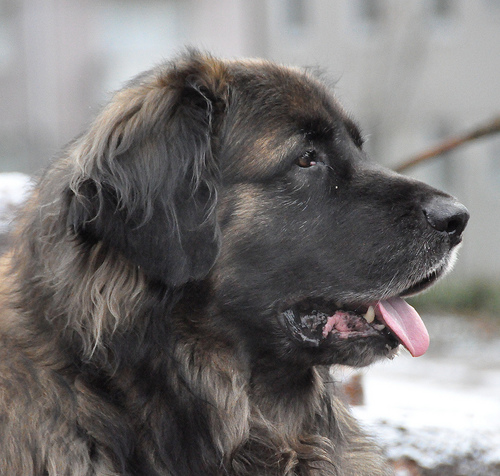

In [9]:
img = PILImage.create(get_image_files(path)[10])
img

In [10]:
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: False.
Probability it's a cat: 0.000035
